<a href="https://colab.research.google.com/github/mark642/employee_analysis/blob/main/EmployeeAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix

In [3]:
df = pd.read_csv('HR Employee Attrition.csv')

In [4]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [6]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# **Hypotheses**

1. Monthly income affects the employee attrition
2. The older the employee, the higher the risk of attrition
3. Satisfaction at work influences the attrition
4. Total years work affects the employee attrition
5. Relationship satisfaction affects the employee attrition

  index  Attrition
0    No       1233
1   Yes        237


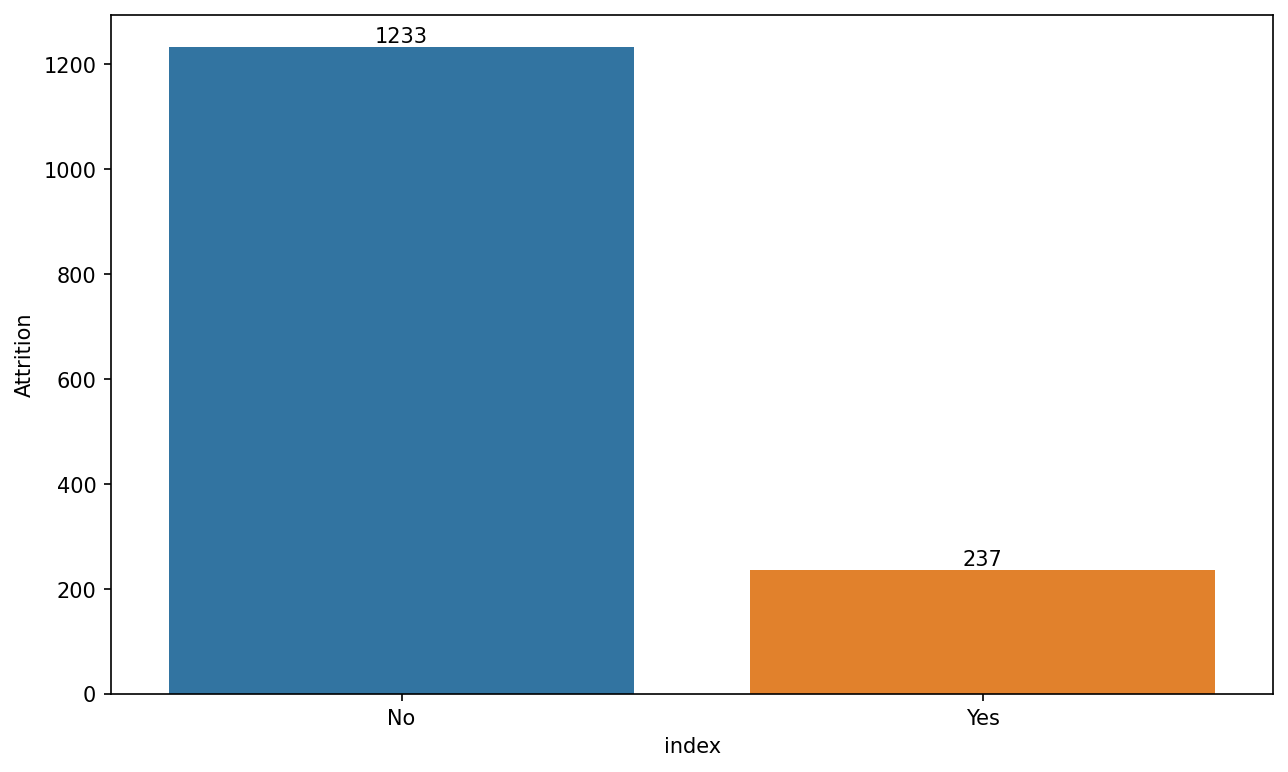

In [45]:
target = df.Attrition.value_counts().reset_index()

print(target)

plt.figure(figsize=(10, 6), dpi=150)

ax = sns.barplot(data=target, x='index', y='Attrition')

for p in ax.patches:
   ax.annotate(
       f'{int(p.get_height())}',
       xy = ((p.get_x() + p.get_width() / 2.), p.get_height() + 20),
       ha='center',
       va='center',
   )

<Figure size 1500x900 with 0 Axes>

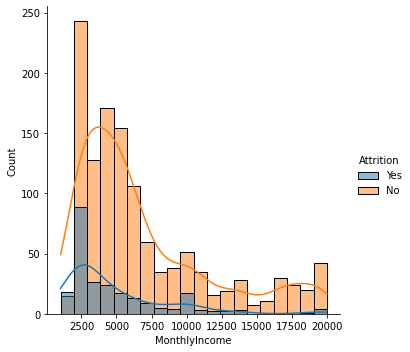

In [54]:
mon_inc = df[['MonthlyIncome', 'Attrition']]

plt.figure(figsize=(10, 6), dpi=150)

sns.displot(data=mon_inc, x='MonthlyIncome', hue='Attrition', kde=True)

<Figure size 1500x900 with 0 Axes>

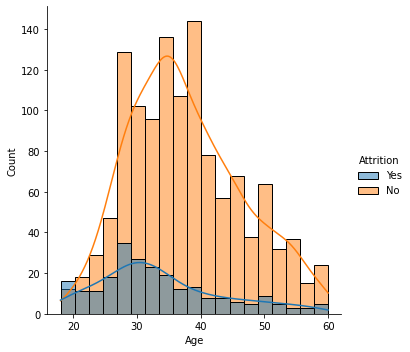

In [55]:
mon_inc = df[['Age', 'Attrition']]

plt.figure(figsize=(10, 6), dpi=150)

sns.displot(data=mon_inc, x='Age', hue='Attrition', kde=True)

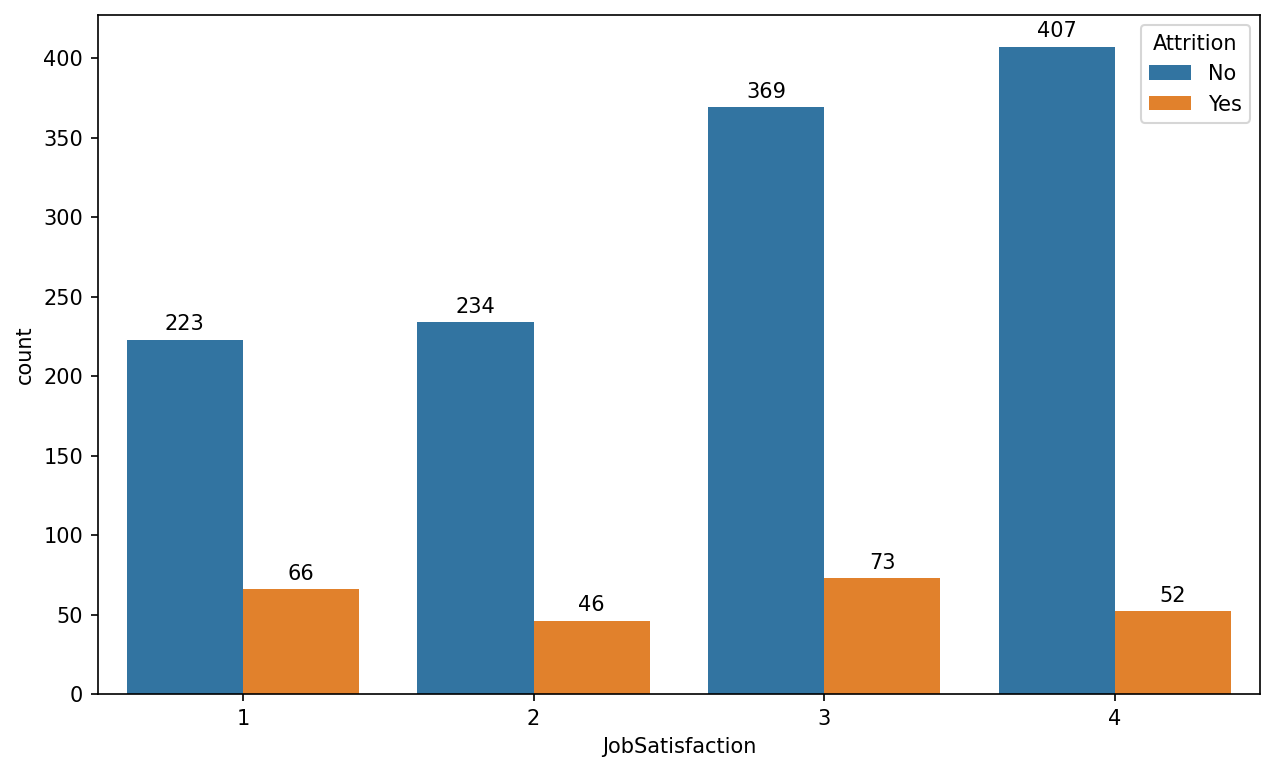

In [65]:
job_satisfaction = df.groupby(['Attrition'])['JobSatisfaction'].value_counts().rename('count').reset_index()

plt.figure(figsize=(10, 6), dpi=150)

ax = sns.barplot(data=job_satisfaction, x='JobSatisfaction', y='count', hue='Attrition')

for p in ax.patches:
   ax.annotate(
       f'{int(p.get_height())}',
       xy = ((p.get_x() + p.get_width() / 2.), p.get_height() + 10),
       ha='center',
       va='center',
   )

<Figure size 1500x900 with 0 Axes>

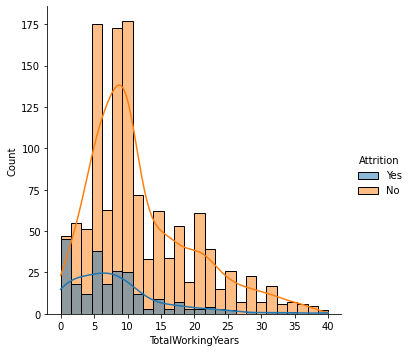

In [69]:
mon_inc = df[['TotalWorkingYears', 'Attrition']]

plt.figure(figsize=(10, 6), dpi=150)

sns.displot(data=mon_inc, x='TotalWorkingYears', hue='Attrition', kde=True)

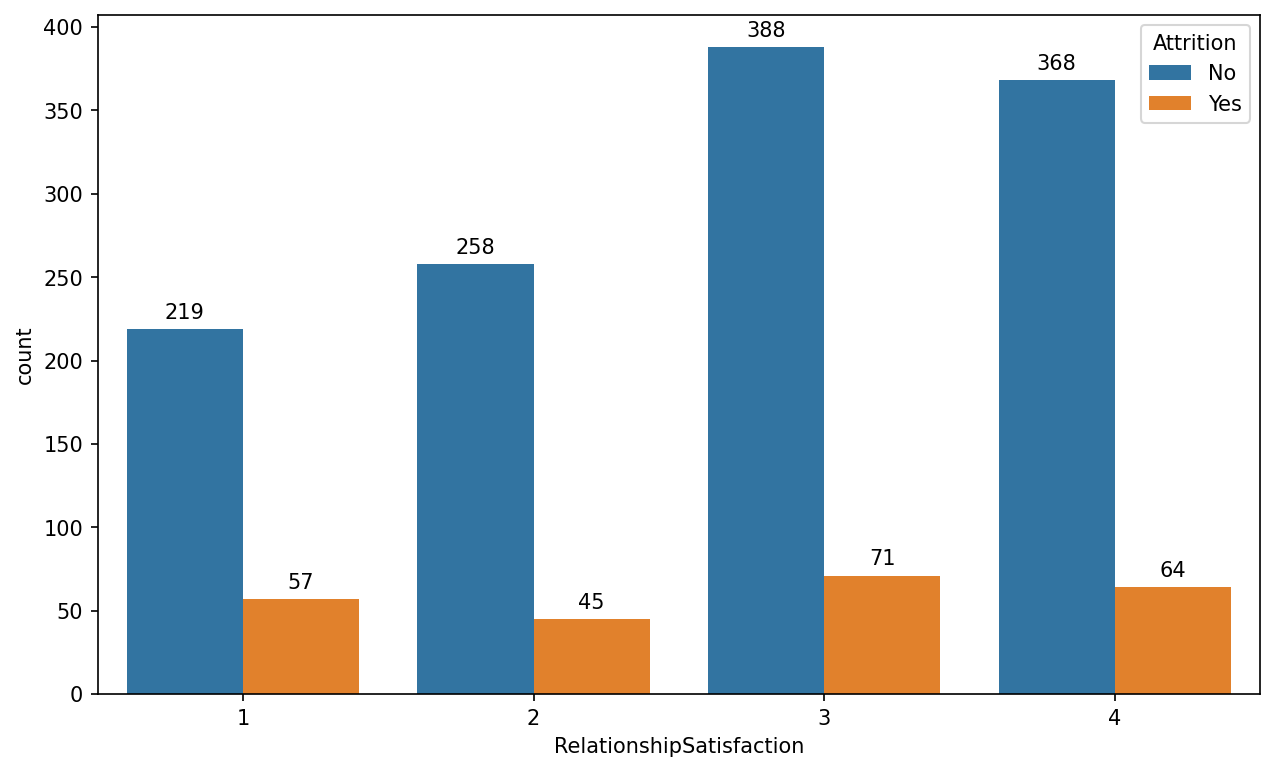

In [73]:
relship_satisfaction = df.groupby(['Attrition'])['RelationshipSatisfaction'].value_counts().rename('count').reset_index()

plt.figure(figsize=(10, 6), dpi=150)

ax = sns.barplot(data=relship_satisfaction, x='RelationshipSatisfaction', y='count', hue='Attrition')

for p in ax.patches:
   ax.annotate(
       f'{int(p.get_height())}',
       xy = ((p.get_x() + p.get_width() / 2.), p.get_height() + 10),
       ha='center',
       va='center',
   )

In [75]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [77]:
X = pd.get_dummies(X)

In [81]:
y = y.map({'Yes': 1, 'No': 0})

In [83]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [86]:
sc = StandardScaler()

In [87]:
X = sc.fit_transform(X)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

array([[-1.74368662, -1.36718946,  0.09963874, ...,  0.        ,
         0.62824112, -0.62824112],
       [-0.53916626,  0.06077342, -1.01090934, ...,  0.        ,
         0.62824112, -0.62824112],
       [-1.30567922, -1.39445959, -0.51733242, ...,  0.        ,
        -1.59174553,  1.59174553],
       ...,
       [-1.63418477,  1.12430828, -0.76412088, ...,  0.        ,
        -1.59174553,  1.59174553],
       [-0.86767181,  1.42675875,  0.46982144, ...,  0.        ,
        -1.59174553,  1.59174553],
       [ 1.43186707, -1.33496114, -0.02375549, ...,  0.        ,
        -1.59174553,  1.59174553]])

In [92]:
def model_fit_predict(model):
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  print(classification_report(y_test, preds))

In [91]:
lin_model = LogisticRegression()

In [93]:
model_fit_predict(lin_model)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       124
           1       0.69      0.39      0.50        23

    accuracy                           0.88       147
   macro avg       0.79      0.68      0.72       147
weighted avg       0.86      0.88      0.86       147



In [98]:
svm = SVC()

In [99]:
model_fit_predict(svm)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       124
           1       1.00      0.17      0.30        23

    accuracy                           0.87       147
   macro avg       0.93      0.59      0.61       147
weighted avg       0.89      0.87      0.83       147



In [100]:
knn = KNeighborsClassifier()

In [101]:
model_fit_predict(knn)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       124
           1       0.67      0.17      0.28        23

    accuracy                           0.86       147
   macro avg       0.77      0.58      0.60       147
weighted avg       0.83      0.86      0.82       147



In [102]:
rfc = RandomForestClassifier()

In [103]:
model_fit_predict(rfc)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       124
           1       0.67      0.17      0.28        23

    accuracy                           0.86       147
   macro avg       0.77      0.58      0.60       147
weighted avg       0.83      0.86      0.82       147



In [104]:
grid_svm = SVC()

In [111]:
grid_params = {
    'C': np.linspace(1, 20, 10),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': np.linspace(1, 20, 10),
    'gamma': ['scale', 'auto'], 
}

In [112]:
grid = GridSearchCV(grid_svm, grid_params, verbose=2)

In [ ]:
grid.fit(X_train, y_train)

In [114]:
grid.best_params_

{'C': 7.333333333333334, 'degree': 1.0, 'gamma': 'auto', 'kernel': 'poly'}

In [115]:
final_svm = SVC(C=7.333333333333334, degree=1.0, gamma='auto', kernel='poly')

In [116]:
model_fit_predict(final_svm)

              precision    recall  f1-score   support

           0       0.90      0.98      0.93       124
           1       0.75      0.39      0.51        23

    accuracy                           0.88       147
   macro avg       0.82      0.68      0.72       147
weighted avg       0.87      0.88      0.87       147

